<a href="https://colab.research.google.com/github/astap4/Image-detection/blob/main/Cats_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from google.colab import files
import glob
import os
import shutil

In [ ]:
train, _ = tfds.load('cats_vs_dogs', split=['train[:100%]'], with_info=True, as_supervised=True) # załadowanie zbioru danych "cats_vs_dogs" z biblioteki TensorFlow Datasets (TFDS)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteRD62BP/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [ ]:
SIZE = 200   #przetwarzanie i zmiany rozmiaru obrazów
def resize_image(img, label):
  img = tf.cast(img, tf.float32) # Konwersja obrazu do typu tf.float32
  img = tf.image.resize(img, (SIZE, SIZE)) # Zmiana rozmiaru obrazu na (SIZE, SIZE)
  img = img / 255.0  # Normalizacja wartości pikseli obrazu
  return img, label # Zwrócenie przetworzonego obrazu i oryginalnej etykiety

In [ ]:
train_resized = train[0].map(resize_image) # Przetwarzanie obrazów treningowych poprzez zmianę rozmiaru
train_batches = train_resized.shuffle(1000).batch(16) # Przetasowanie i podział danych treningowych na paczki


In [ ]:
base_layers = tf.keras.applications.MobileNetV2(input_shape=(SIZE, SIZE, 3), include_top=False)# Tworzenie modelu bazowego MobileNetV2 z pre-trenowanymi wagami
base_layers.trainable = False # Ustawienie atrybutu trainable na False, aby nie aktualizować wag modelu podczas uczenia

In [ ]:
model = tf.keras.Sequential([                             # Definicja modelu sieci neuronowej
                             base_layers,
                             GlobalAveragePooling2D(),
                             Dropout(0.2),
                             Dense(1)
])
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy']) # Kompilacja modelu z ustawieniem optymalizatora, funkcji straty i metryki

In [ ]:
model.fit(train_batches, epochs=3)

Epoch 1/3
1454/1454 [==============================] - 783s 532ms/step - loss: 0.0782 - accuracy: 0.9700
Epoch 2/3
1454/1454 [==============================] - 755s 518ms/step - loss: 0.0508 - accuracy: 0.9813
Epoch 3/3
1454/1454 [==============================] - 773s 531ms/step - loss: 0.0475 - accuracy: 0.9827


In [ ]:
folder_path = '/content/img'

In [ ]:

image_files = glob.glob(folder_path + '/*.jpg')


1/1 [==============================] - 0s 64ms/step


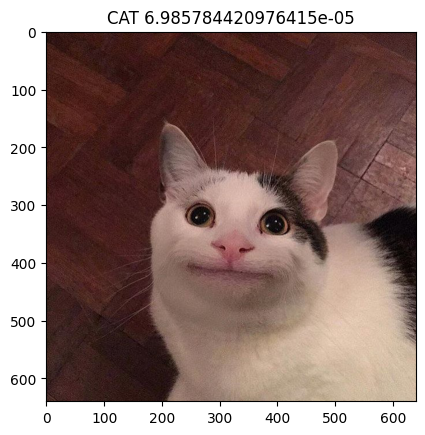

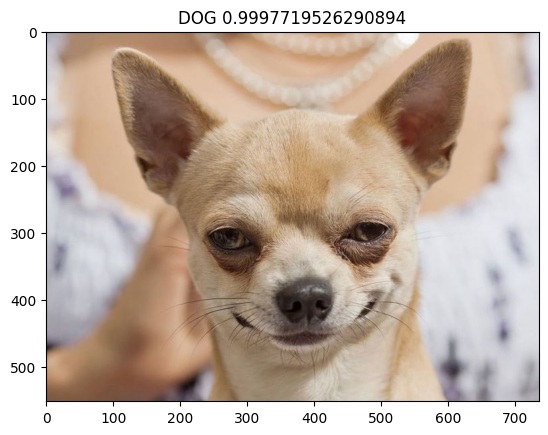

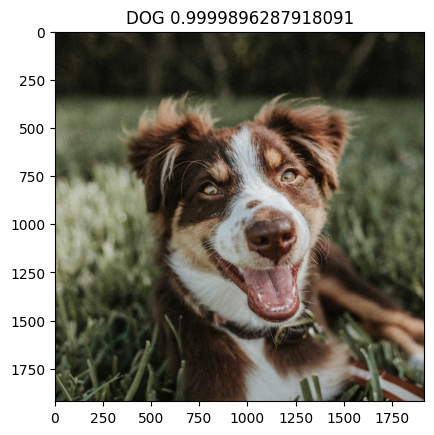

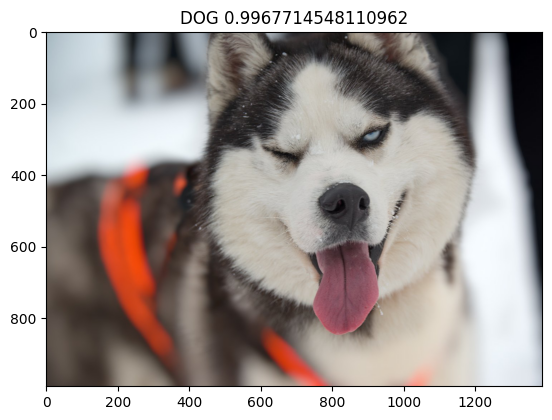

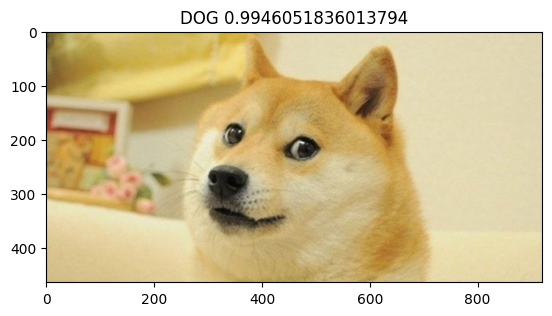

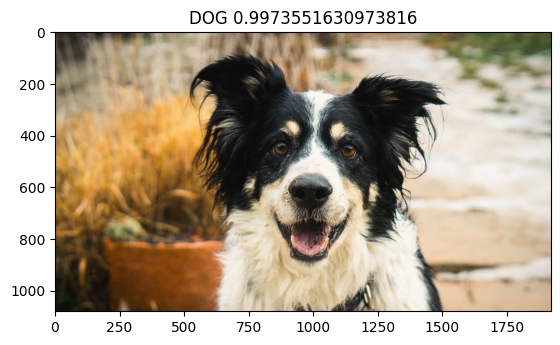

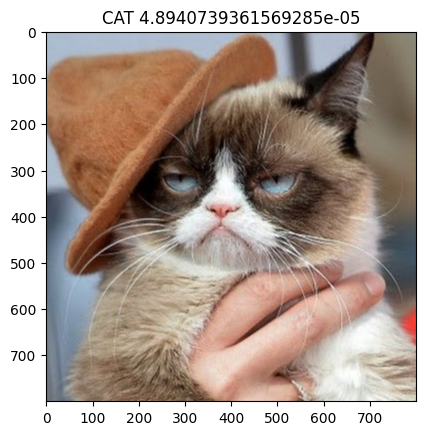

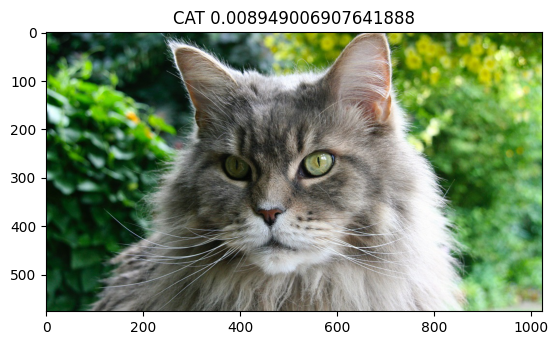

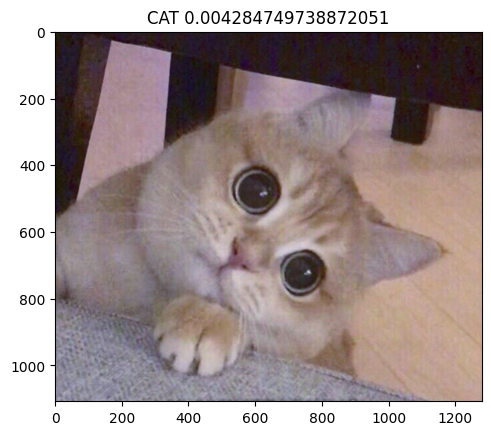

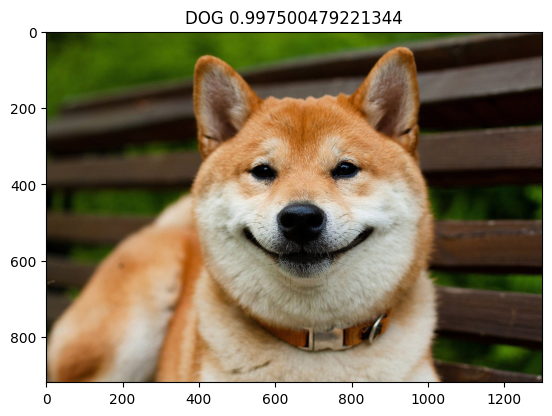

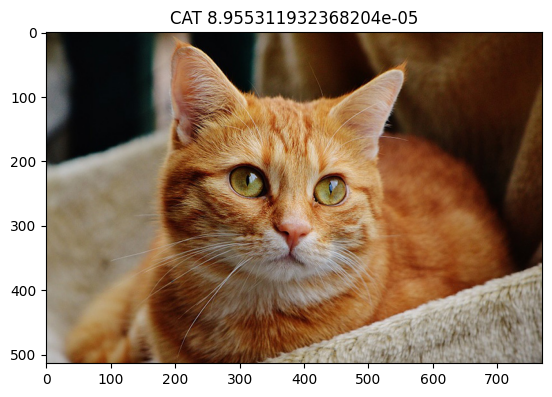

In [ ]:

for uploadedImage in image_files:
  img = load_img(uploadedImage)
  img_array = img_to_array(img)
  img_resized, _ = resize_image(img_array, _)
  img_expended = np.expand_dims(img_resized, axis=0)
  prediction = model.predict(img_expended)[0][0]
  result = tf.sigmoid(prediction)
  pred_label = 'CAT' if result < 0.5 else 'DOG'
  plt.figure()
  plt.imshow(img)
  plt.title(f'{pred_label} {result}')

In [ ]:
#można również pobrać obrazy z folderu na komputerze
uploaded = files.upload()

In [ ]:
for uploadedImage in uploaded:
  img = load_img(uploadedImage)
  img_array = img_to_array(img)
  img_resized, _ = resize_image(img_array, _)
  img_expended = np.expand_dims(img_resized, axis=0)
  prediction = model.predict(img_expended)[0][0]
  result = tf.sigmoid(prediction)
  pred_label = 'CAT' if result < 0.5 else 'DOG'
  plt.figure()
  plt.imshow(img)
  plt.title(f'{pred_label} {result}')

In [ ]:
# Tworzenie nowych folderów
dogs_folder = '/content/img/DOGS'
cats_folder = '/content/img/CATS'
os.makedirs(dogs_folder, exist_ok=True)
os.makedirs(cats_folder, exist_ok=True)


In [ ]:
# Przenoszenie zdjęć do odpowiednich folderów
for uploadedImage in image_files:
    img = load_img(uploadedImage)
    img_array = img_to_array(img)
    img_resized, _ = resize_image(img_array, _)
    img_expended = np.expand_dims(img_resized, axis=0)
    prediction = model.predict(img_expended)[0][0]
    result = tf.sigmoid(prediction)
    pred_label = 'CAT' if result < 0.5 else 'DOG'

    if pred_label == 'CAT':
        destination_folder = cats_folder
    else:
        destination_folder = dogs_folder


    file_name = os.path.basename(uploadedImage)


    shutil.move(uploadedImage, os.path.join(destination_folder, file_name))

print("Pliki zostały pomyślnie przeniesione do odpowiednich folderów.")

1/1 [==============================] - 0s 53ms/step
Pliki zostały pomyślnie przeniesione do odpowiednich folderów.
